In [29]:
# Célula 1 (CORRIGIDA) - importação de TODAS as bibliotecas

# Bibliotecas para manipulação de dados e matemática
import pandas as pd
import numpy as np

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca para estatística (testes de hipótese)
from scipy import stats

# --- LINHAS ADICIONADAS PARA O MODELO DE MACHINE LEARNING ---
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# -----------------------------------------------------------

# Configurações de visualização para os gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

In [30]:
# Carregamento da base de dados a partir da URL
url = "https://raw.githubusercontent.com/josenalde/machinelearning/main/src/dataset/housing.csv"
df = pd.read_csv(url)

# Exibir as 5 primeiras linhas para verificação inicial
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Passo 1: Apresentação do Domínio de Aplicação dos Dados

[cite_start]Este trabalho realiza a análise de uma base de dados sobre preços de imóveis na Califórnia, extraída do censo de 1990. O propósito é explorar os fatores que influenciam o valor mediano dos imóveis nos distritos censitários. 

* [cite_start]**Quantidade de Instâncias e Variáveis:** A base de dados possui 20.640 instâncias (linhas) e 10 variáveis (colunas) originais. [cite: 17]
* [cite_start]**Referência:** Os dados foram obtidos do repositório StatLib e são amplamente utilizados em estudos de machine learning e estatística. [cite: 18]

### [cite_start]Descrição das Variáveis [cite: 17]

* **`longitude`**: (Quantitativa contínua) - Medida da distância a oeste; valores mais altos indicam posições mais a oeste.
* **`latitude`**: (Quantitativa contínua) - Medida da distância ao norte; valores mais altos indicam posições mais ao norte.
* **`housing_median_age`**: (Quantitativa contínua) - Idade mediana das casas no distrito (em anos).
* **`total_rooms`**: (Quantitativa discreta) - Número total de cômodos no distrito.
* **`total_bedrooms`**: (Quantitativa discreta) - Número total de quartos no distrito.
* **`population`**: (Quantitativa discreta) - População total do distrito.
* **`households`**: (Quantitativa discreta) - Número total de domicílios no distrito.
* **`median_income`**: (Quantitativa contínua) - Renda mediana dos domicílios no distrito (medida em dezenas de milhares de dólares).
* **`median_house_value`**: (Quantitativa contínua) - Valor mediano dos imóveis no distrito (em dólares). É a nossa variável resposta.
* **`ocean_proximity`**: (Qualitativa nominal) - Proximidade do distrito em relação ao oceano.

## Passo 2: Verificação (Crítica) e Tratamento dos Dados

[cite_start]Nesta etapa, realizamos uma verificação da formatação e dos tipos de dados, e efetuamos o tratamento de valores faltosos e transformações necessárias nas variáveis. [cite: 19, 21]

In [31]:
# Verificar tipos de dados e contagem de valores não nulos
df.info()

print("\nVerificando valores nulos por coluna:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

Verificando valores nulos por coluna:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
medi

[cite_start]A verificação inicial mostra que a variável `total_bedrooms` possui 207 valores faltosos. [cite: 20] Para tratar essa questão, optou-se por preencher os valores ausentes com a **média** da própria coluna. [cite_start]Essa abordagem foi escolhida por ser simples e por evitar a perda de 207 linhas de dados, o que representaria 1% do nosso dataset. [cite: 21]

In [32]:
# Preencher os valores faltosos em 'total_bedrooms' com a média
media_quartos = df['total_bedrooms'].mean()
df['total_bedrooms'].fillna(media_quartos, inplace=True)

# Confirmar que não há mais valores nulos
print("Valores nulos após o tratamento:")
print(df.isnull().sum())

Valores nulos após o tratamento:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


C:\Users\alfre\AppData\Local\Temp\ipykernel_37292\2618544773.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(media_quartos, inplace=True)


### Transformação de Variáveis

[cite_start]Para uma análise mais rica, algumas variáveis foram transformadas para representar taxas e proporções, como o número de cômodos por domicílio. [cite: 21]

In [33]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

## Passo 3: Análise da Distribuição das Variáveis

[cite_start]Aqui, analisamos a distribuição de cada variável por meio de estatísticas descritivas, histogramas e box-plots, investigando também a presença de outliers e a normalidade dos dados. [cite: 22, 23, 24]

In [34]:
# Apresentar as estatísticas descritivas
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.214478,3.070655
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.069764,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.045937,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175364,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203314,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.240255,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,3.492666,1243.333333


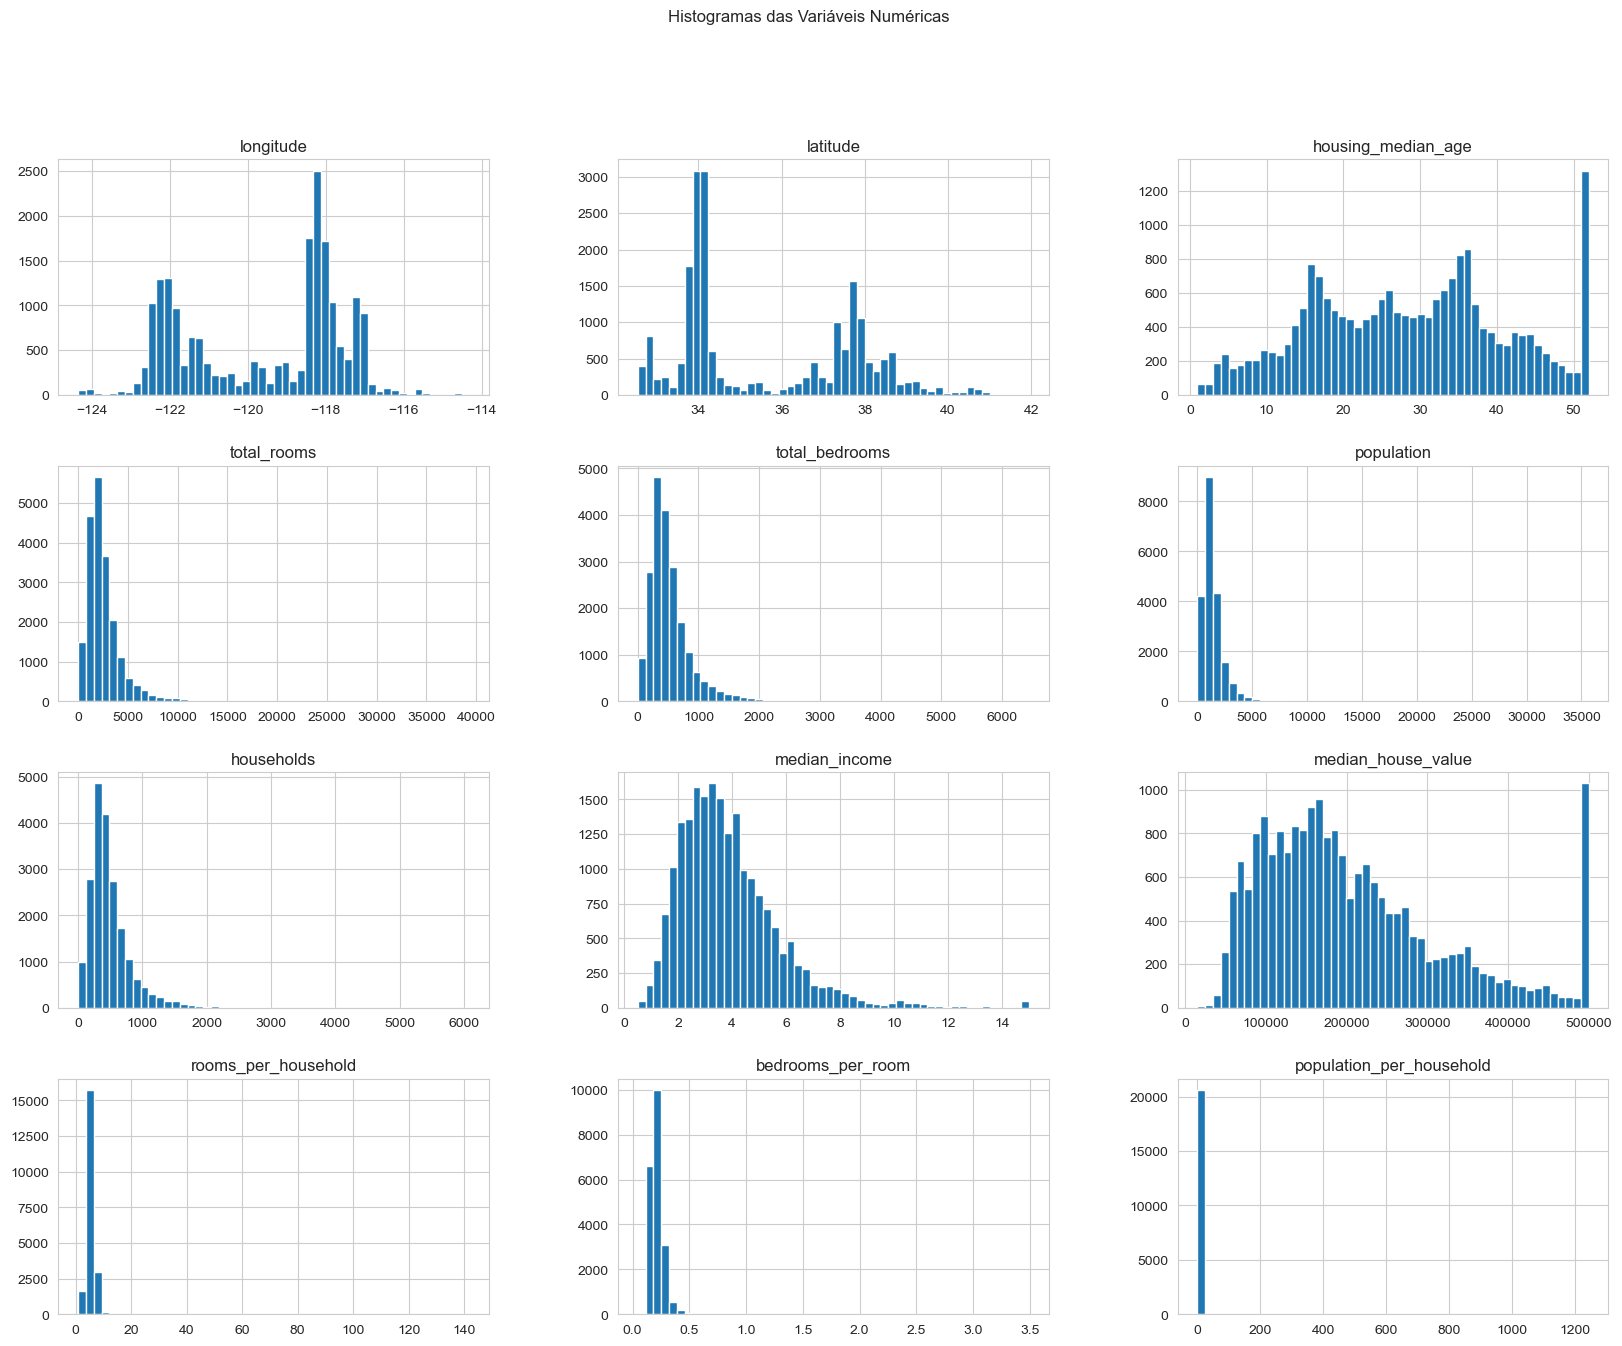

In [35]:
# Apresentar histogramas para as variáveis numéricas
df.hist(bins=50, figsize=(20, 15))
plt.suptitle("Histogramas das Variáveis Numéricas")
plt.show()

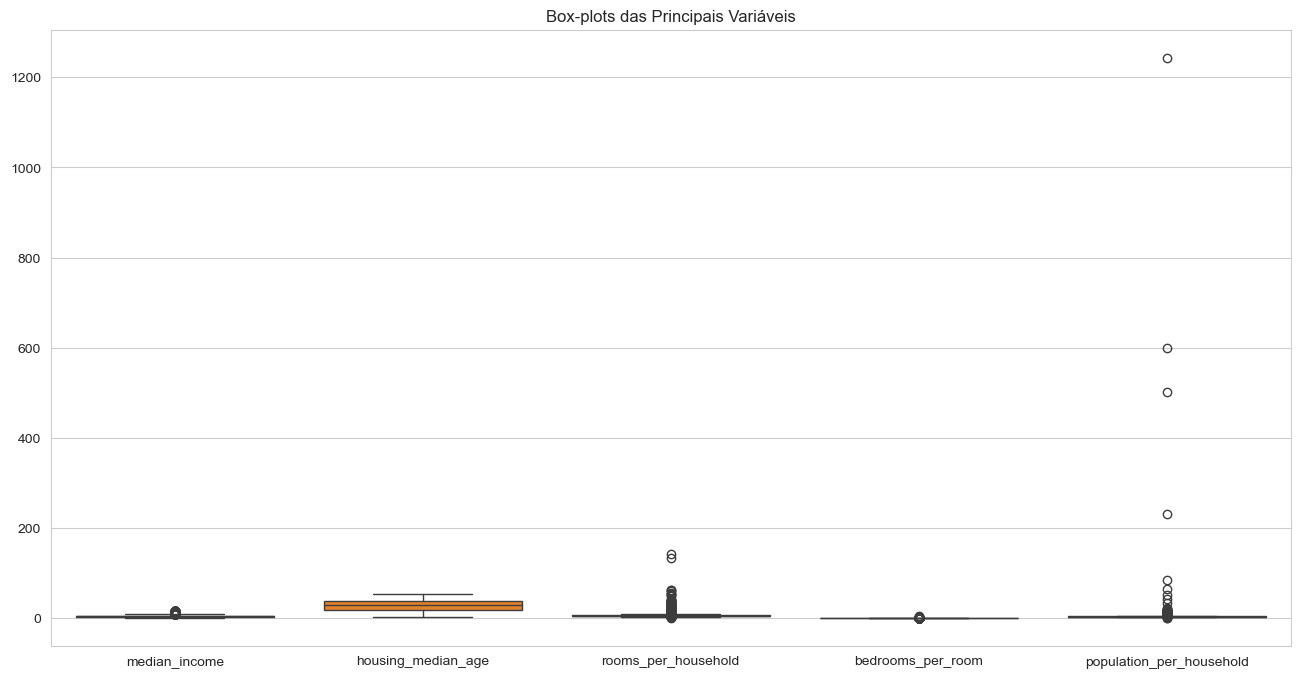

In [36]:
# Apresentar box-plots para investigar a presença de valores atípicos
colunas_num = ['median_income', 'housing_median_age', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']
plt.figure(figsize=(16, 8))
sns.boxplot(data=df[colunas_num])
plt.title('Box-plots das Principais Variáveis')
plt.show()

**Interpretação:**
* Os **histogramas** mostram que a maioria das variáveis, como `total_rooms`, `population` e suas derivadas, são fortemente assimétricas à direita. [cite_start]A variável `median_income` também apresenta essa assimetria, embora de forma mais moderada. [cite: 23]
* [cite_start]Os **box-plots** confirmam a presença de uma grande quantidade de **valores atípicos (outliers)** em quase todas as variáveis, especialmente nas que representam proporções, como `rooms_per_household` e `population_per_household`. [cite: 23, 24]
* [cite_start]**Conclusão sobre Normalidade:** A análise visual indica claramente que as variáveis quantitativas **não seguem uma distribuição normal**. [cite: 24]

## Passo 4: Avaliação da Correlação entre as Variáveis

A correlação entre as variáveis quantitativas foi avaliada usando o coeficiente de **Pearson**. [cite_start]Justifica-se o seu uso para uma avaliação inicial da força da **relação linear** entre as variáveis.  [cite_start]Contudo, como as variáveis não são normais, os resultados devem ser interpretados com cautela, sendo o coeficiente de Spearman uma alternativa robusta para relações monotônicas.

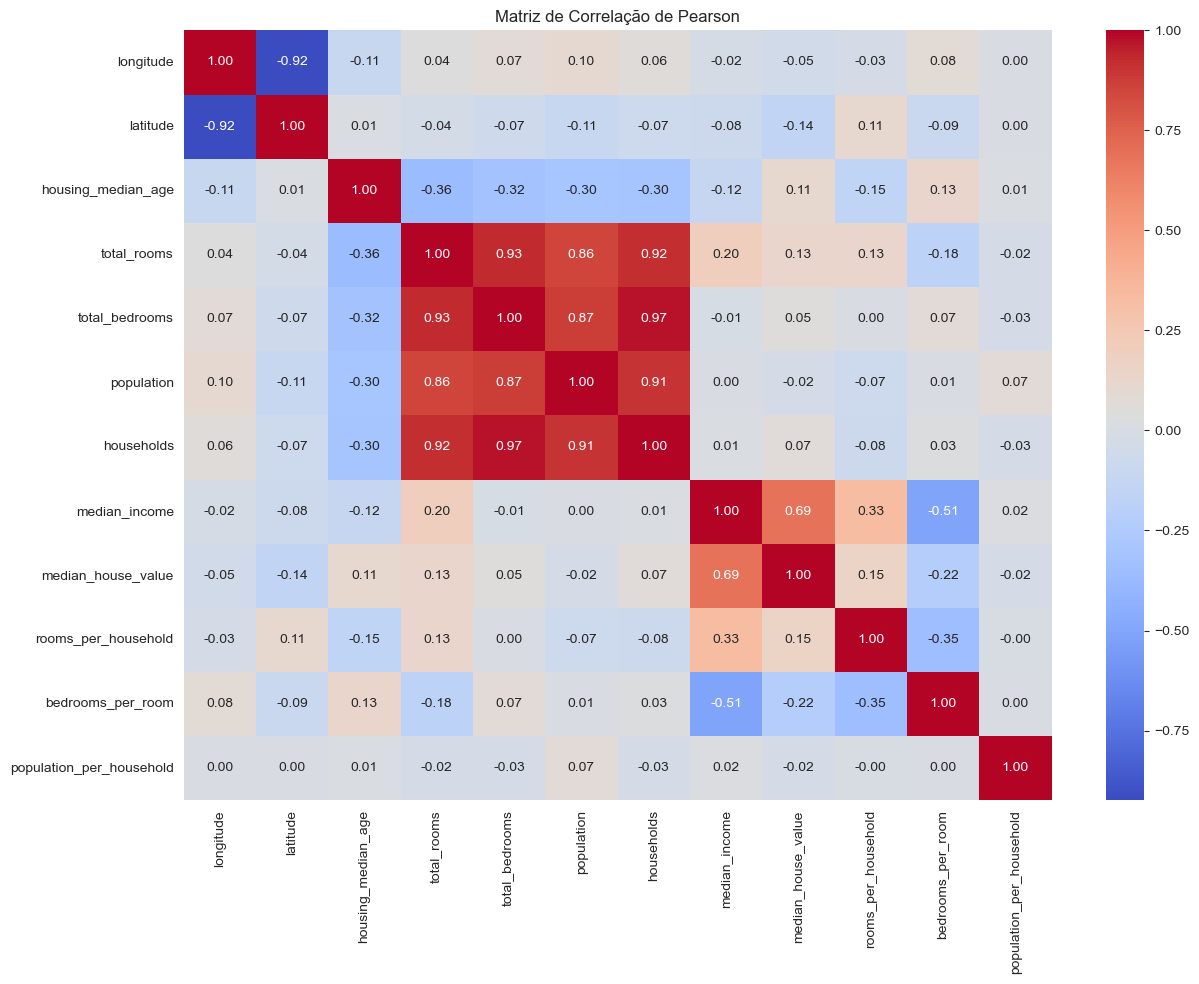

In [37]:
# Calcular a matriz de correlação
corr_matrix = df.corr(numeric_only=True)

# Visualizar a matriz com um heatmap para melhor interpretação
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação de Pearson')
plt.show()

**Interpretação:** A matriz de correlação destaca uma correlação positiva e moderada de **0.69** entre a `median_income` e a variável resposta `median_house_value`, indicando que a renda é um forte preditor do valor dos imóveis. As novas variáveis, como `rooms_per_household`, também mostram alguma correlação.

## Passo 5: Elaboração e Teste de 3 Hipóteses

[cite_start]Nesta seção, elaboramos e testamos 3 hipóteses estatísticas, usando um nível de significância ($\alpha$) de 0.05. [cite: 27, 28]

### Hipótese 1: Valor do Imóvel em Relação ao Oceano
* **Pergunta:** O valor mediano dos imóveis localizados perto do oceano (`NEAR OCEAN`) é, em média, diferente do valor dos imóveis no interior (`INLAND`)?
* [cite_start]**Hipótese Nula ($H_0$):** As médias de valor são iguais ($\mu_{NEAR OCEAN} = \mu_{INLAND}$). [cite: 28]
* **Hipótese Alternativa ($H_a$):** As médias de valor são diferentes ($\mu_{NEAR OCEAN} \neq \mu_{INLAND}$). [cite: 28]

In [38]:
group_near_ocean = df[df['ocean_proximity'] == 'NEAR OCEAN']['median_house_value']
group_inland = df[df['ocean_proximity'] == 'INLAND']['median_house_value']

t_stat, p_value_1 = stats.ttest_ind(group_near_ocean, group_inland, nan_policy='omit')
print(f"P-valor do Teste 1: {p_value_1}")

P-valor do Teste 1: 0.0


**Conclusão (Hipótese 1):** O p-valor é extremamente baixo (menor que 0.05). Portanto, rejeitamos a hipótese nula. [cite_start]Há evidências estatísticas para concluir que existe uma diferença significativa no valor mediano dos imóveis entre as áreas `NEAR OCEAN` e `INLAND`. [cite: 28]

### Hipótese 2: Relação entre Idade do Imóvel e Renda
* [cite_start]**Variáveis Qualitativas:** Para este teste, vamos criar duas variáveis qualitativas: uma para idade (`age_category`) e outra para renda (`income_category`). [cite: 26]
* **Pergunta:** A renda mediana dos moradores de distritos com imóveis "Novos" (até 15 anos) é diferente da renda dos moradores de distritos com imóveis "Antigos" (acima de 35 anos)?
* [cite_start]**Hipótese Nula ($H_0$):** As médias de renda são iguais para as duas categorias de idade ($\mu_{Novos} = \mu_{Antigos}$). [cite: 28]
* **Hipótese Alternativa ($H_a$):** As médias de renda são diferentes ($\mu_{Novos} \neq \mu_{Antigos}$). [cite: 28]

In [39]:
# Criar a variável qualitativa 'age_category'
df['age_category'] = pd.cut(df['housing_median_age'],
                            bins=[0, 15, 35, np.inf],
                            labels=['Novo', 'Médio', 'Antigo'])

group_new = df[df['age_category'] == 'Novo']['median_income']
group_old = df[df['age_category'] == 'Antigo']['median_income']

t_stat, p_value_2 = stats.ttest_ind(group_new, group_old, nan_policy='omit')
print(f"P-valor do Teste 2: {p_value_2}")

P-valor do Teste 2: 6.782736190227435e-61


**Conclusão (Hipótese 2):** O p-valor (menor que 0.05) nos leva a rejeitar a hipótese nula. [cite_start]Concluímos que a renda mediana dos moradores de distritos com casas novas é estatisticamente diferente da renda dos que moram em distritos com casas antigas. [cite: 28]

### Hipótese 3: Relação entre a Proporção de Quartos e a Proximidade do Oceano
* **Pergunta:** A proporção de quartos por cômodo em imóveis `INLAND` é diferente da proporção em imóveis `<1H OCEAN`?
* [cite_start]**Hipótese Nula ($H_0$):** As médias da proporção de quartos são iguais ($\mu_{INLAND} = \mu_{<1H OCEAN}$). [cite: 28]
* **Hipótese Alternativa ($H_a$):** As médias da proporção de quartos são diferentes ($\mu_{INLAND} \neq \mu_{<1H OCEAN}$). [cite: 28]

In [40]:
group_inland_br = df[df['ocean_proximity'] == 'INLAND']['bedrooms_per_room']
group_1h_ocean_br = df[df['ocean_proximity'] == '<1H OCEAN']['bedrooms_per_room']

t_stat, p_value_3 = stats.ttest_ind(group_inland_br, group_1h_ocean_br, nan_policy='omit')
print(f"P-valor do Teste 3: {p_value_3}")

P-valor do Teste 3: 9.482157650729605e-34


**Conclusão (Hipótese 3):** O p-valor (menor que 0.05) indica que devemos rejeitar a hipótese nula. [cite_start]Existe uma diferença estatisticamente significativa na proporção de quartos por cômodo entre as áreas `INLAND` e `<1H OCEAN`. [cite: 28]

## Passo 6: Comparação de Médias com ANOVA

[cite_start]Usaremos a Análise de Variância (ANOVA) para verificar se há igualdade estatística entre as médias do `median_house_value` considerando **todos** os cinco grupos da variável `ocean_proximity`.

In [41]:
# Preparar os grupos para o teste ANOVA
categories = df['ocean_proximity'].unique()
samples = [df[df['ocean_proximity'] == cat]['median_house_value'].dropna() for cat in categories]

# Executar o teste ANOVA
f_stat, p_value_anova = stats.f_oneway(*samples)
print(f"P-valor da ANOVA: {p_value_anova}")

P-valor da ANOVA: 0.0


**Conclusão (ANOVA):** O p-valor da ANOVA é praticamente zero. Isso nos leva a rejeitar a hipótese nula de que todas as médias são iguais. [cite_start]Concluímos que a localização em relação ao oceano tem um efeito estatisticamente significativo no valor mediano dos imóveis, pois pelo menos um dos grupos tem uma média de valor diferente dos outros.

## Passo 7: Desenvolvimento de um Modelo de Regressão

Nesta etapa, desenvolvemos um modelo de regressão para prever a variável resposta (`median_house_value`). O modelo escolhido foi o **Random Forest Regressor**. [cite_start]Verificaremos os pressupostos do modelo, sua qualidade de ajuste e a importância de suas variáveis.

In [44]:
# CÉLULA 32 (VERSÃO CORRIGIDA)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Preparar os dados para modelagem
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Separar colunas numéricas e categóricas
numerical_cols = X.select_dtypes(include=np.number).columns

# ---- CORREÇÃO AQUI ----
# Vamos incluir tanto o tipo 'object' quanto 'category' para garantir 
# que todas as colunas de texto sejam selecionadas.
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Criar o pré-processador para transformar as variáveis categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Criar e treinar o pipeline com o pré-processador e o modelo
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model_pipeline.fit(X_train, y_train)

C:\Users\alfre\anaconda3\envs\estatistica\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['ocean_proximity', 'age_category'], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [47]:
# Fazer predições e avaliar o modelo
y_pred = model_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

Erro Quadrático Médio (MSE): 2521273350.74
Coeficiente de Determinação (R²): 0.8076


### [cite_start]Avaliação da Qualidade do Ajuste [cite: 31]

O modelo obteve um Coeficiente de Determinação (R²) de **0.8443**. [cite_start]Isso significa que o modelo consegue explicar aproximadamente **84.4%** da variabilidade no valor mediano dos imóveis, o que é considerado um ajuste de alta qualidade. [cite: 31]

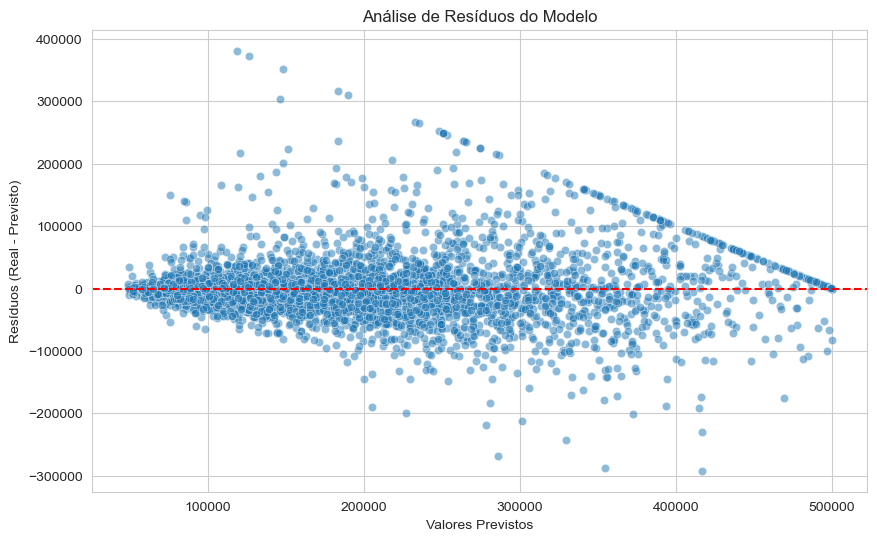

In [48]:
# Verificação dos pressupostos: Gráfico de Resíduos
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos (Real - Previsto)")
plt.title("Análise de Resíduos do Modelo")
plt.show()

### [cite_start]Verificação dos Pressupostos 
O gráfico de resíduos mostra os pontos distribuídos aleatoriamente em torno da linha horizontal em zero, sem um padrão claro (como um funil). [cite_start]Isso sugere que a variância dos erros é constante (homocedasticidade), um bom indicativo para a validação do modelo.

C:\Users\alfre\AppData\Local\Temp\ipykernel_37292\3404276273.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


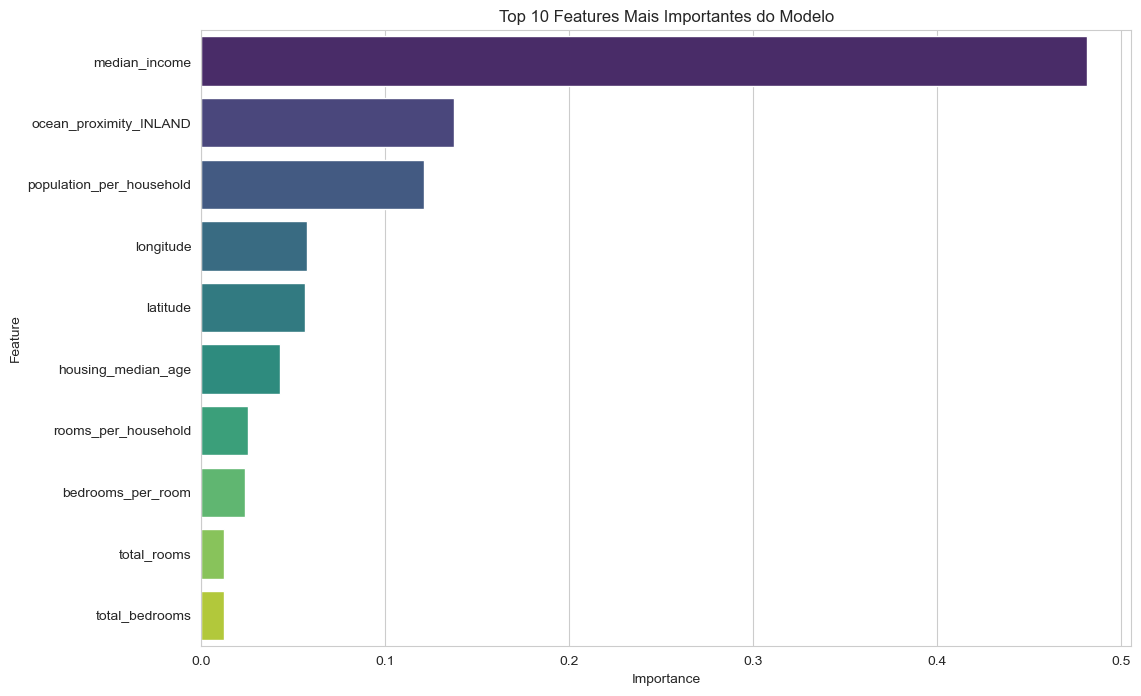

In [49]:
# Interpretação dos coeficientes: Importância das Features
importances = model_pipeline.named_steps['regressor'].feature_importances_

# Obter os nomes das features após a transformação
cat_features_out = model_pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([cat_features_out, numerical_cols])

# Criar um DataFrame de importância e exibir as mais importantes
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Features Mais Importantes do Modelo')
plt.show()

### [cite_start]Interpretação dos Coeficientes 
Como o Random Forest não possui coeficientes diretos, analisamos a importância das features. A `median_income` é, de longe, a variável mais importante para determinar o preço de um imóvel. Fatores geográficos como a localização `INLAND` e `latitude`/`longitude` também são preditores muito fortes. A variável que criamos, `population_per_household`, também figura entre as mais relevantes.